# Synthetic Circular data with gain simulated (dynamic place fields) for hippocampal dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cebra


# Set random seed for reproducibility
np.random.seed(42)

## Set synthetic parameters and simulate gain change, also plot the neural activity over time

0.06289474781961547
0.06289474781961547
0.06289474781961549
0.06289474781961546
0.06289474781961546
0.06289474781961552
0.06289474781961546
0.06289474781961546
0.06289474781961546
0.06289474781961546
0.06289474781961546
0.06289474781961557
0.06289474781961546
0.06289474781961546
0.06289474781961546
0.06289474781961546
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961535
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961513
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961513
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961513
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961557
0.06289474781961513
0.06289474781961557


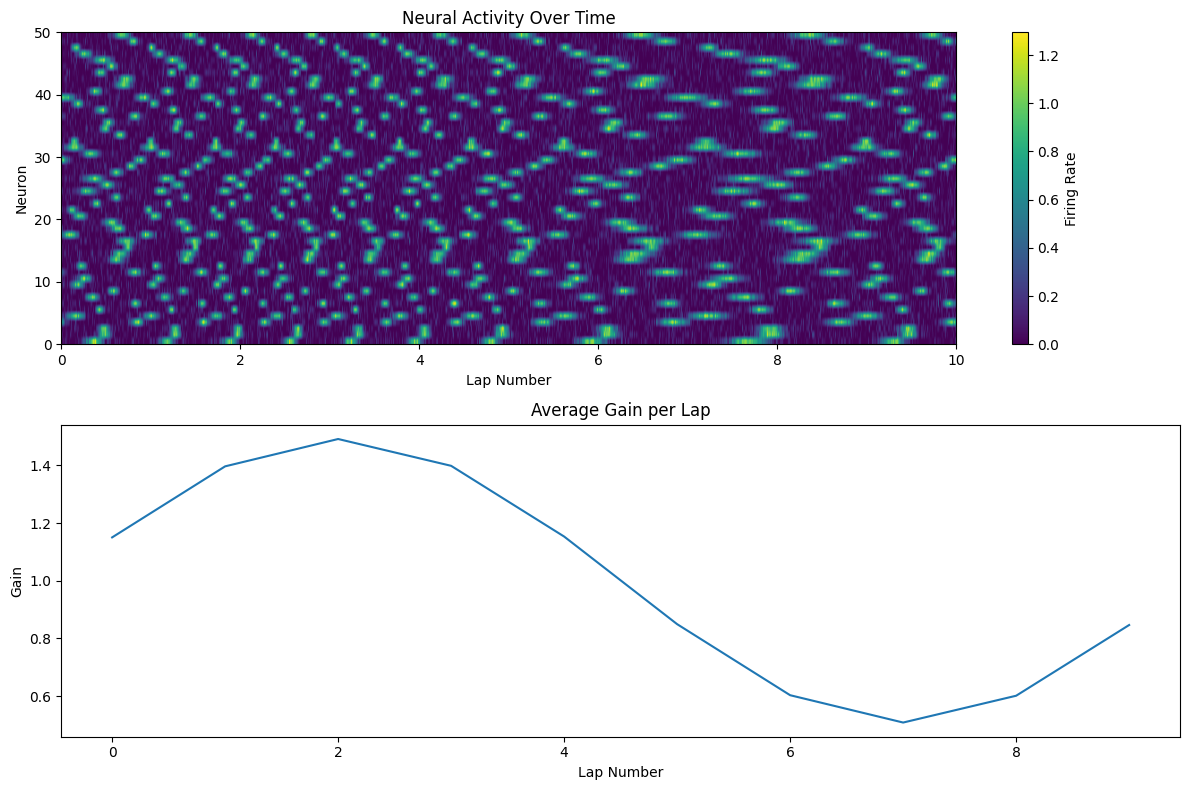

Shape of neural data: (1000, 50)
Mean firing rate: 0.166
Max firing rate: 1.294
Min gain: 0.500
Max gain: 1.500


In [6]:


# Parameters
n_neurons = 50
n_laps = 10
n_positions_per_lap = 100
track_length = 2 * np.pi  # Full circle in radians
total_positions = n_laps * n_positions_per_lap

# Create position array
positions = np.linspace(0, n_laps * track_length, total_positions)


# Create time array (assuming constant speed, should change later since not entirely realistic)
time = np.arange(total_positions)
#print(time)

# Function to create place fields
def create_place_fields(n_neurons, track_length):
    centers = np.random.uniform(0, track_length, n_neurons)
    widths = np.random.uniform(0.2, 0.5, n_neurons)
    return centers, widths

# Function to calculate neural activity
def calculate_activity(position, centers, widths):
    distances = np.minimum(np.abs(position - centers), track_length - np.abs(position - centers))
    return np.exp(-((distances) ** 2) / (2 * widths ** 2))

# Create initial place fields
centers, widths = create_place_fields(n_neurons, track_length)

# Initialize neural data array
neural_data = np.zeros((total_positions, n_neurons))

# Simulate changing gain over time
base_gain = 1.0
gain_change_rate = 0.5
gain = base_gain + gain_change_rate * np.sin(2 * np.pi * time / total_positions)

hippocampal_position = np.zeros(len(positions))
for i in range (1,len(positions)):
    delta_pos = positions[i] - positions[i-1]
    hippocampal_position[i] = hippocampal_position[i-1] + delta_pos*gain[i]

# for i in range(1,len(hippocampal_position)):
#     print(hippocampal_position[i]-hippocampal_position[i-1])

# Generate neural activity
for i, pos in enumerate(hippocampal_position):
    neural_data[i] = calculate_activity(pos % track_length, centers, widths)

# Add noise
noise_level = 0.1
neural_data += np.random.normal(0, noise_level, neural_data.shape)
neural_data = np.maximum(neural_data, 0)  # Ensure non-negative firing rates

# Plotting
plt.figure(figsize=(12, 8))

# Plot neural activity
plt.subplot(211)
plt.imshow(neural_data.T, aspect='auto', cmap='viridis', 
           extent=[0, n_laps, 0, n_neurons])
plt.colorbar(label='Firing Rate')
plt.title('Neural Activity Over Time')
plt.xlabel('Lap Number')
plt.ylabel('Neuron')

# Plot gain over time
plt.subplot(212)
plt.plot(np.arange(n_laps), gain.reshape(-1, n_positions_per_lap).mean(axis=1))
plt.title('Average Gain per Lap')
plt.xlabel('Lap Number')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Shape of neural data: {neural_data.shape}")
print(f"Mean firing rate: {neural_data.mean():.3f}")
print(f"Max firing rate: {neural_data.max():.3f}")
print(f"Min gain: {gain.min():.3f}")
print(f"Max gain: {gain.max():.3f}")

## Create 2D model and display the embeddings

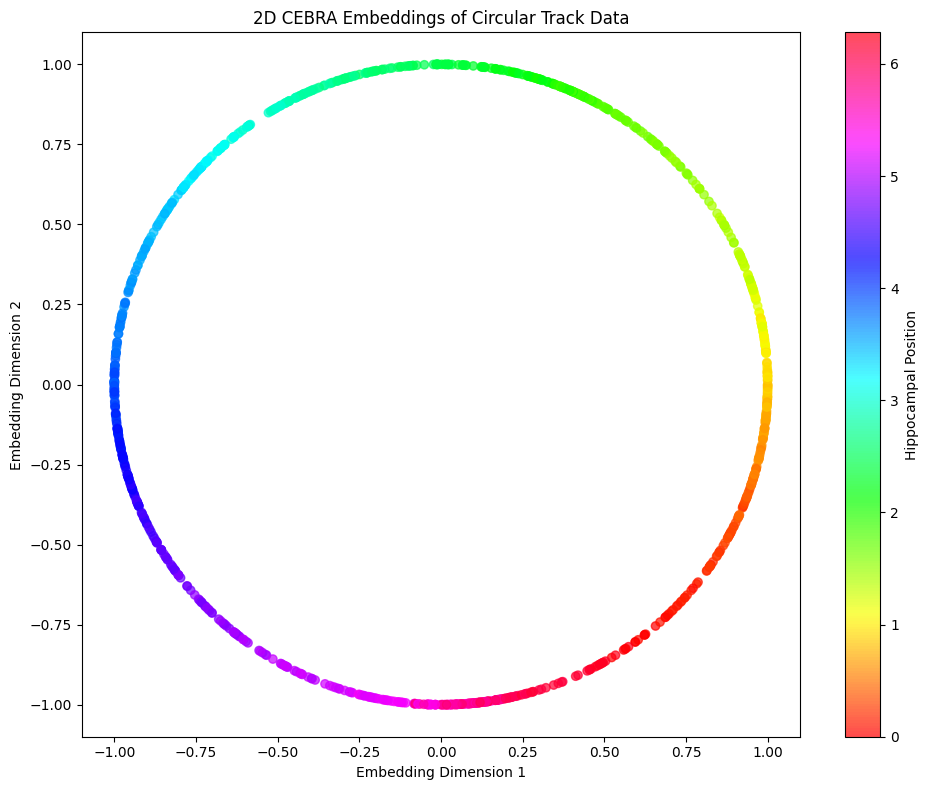

Embedding shape: (1000, 2)
Min values: [-0.99999946 -0.99999928]
Max values: [1.         0.99999779]


In [3]:
# Create and fit the CEBRA model
model_2d = cebra.CEBRA(output_dimension=2, batch_size=512, learning_rate=3e-4, max_iterations=1000)
model_2d.fit(neural_data)

# Transform the data to get the embeddings_2d
embeddings_2d = model_2d.transform(neural_data)

# Create the plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], 
                      embeddings_2d[:, 1], 
                      c=hippocampal_position % (2*np.pi), 
                      cmap='hsv',
                      alpha=0.7)

plt.colorbar(scatter, label='Hippocampal Position')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('2D CEBRA Embeddings of Circular Track Data')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Embedding shape: {embeddings_2d.shape}")
print(f"Min values: {embeddings_2d.min(axis=0)}")
print(f"Max values: {embeddings_2d.max(axis=0)}")

## Now, we apply CEBRA in 3 dimesnion and plot below

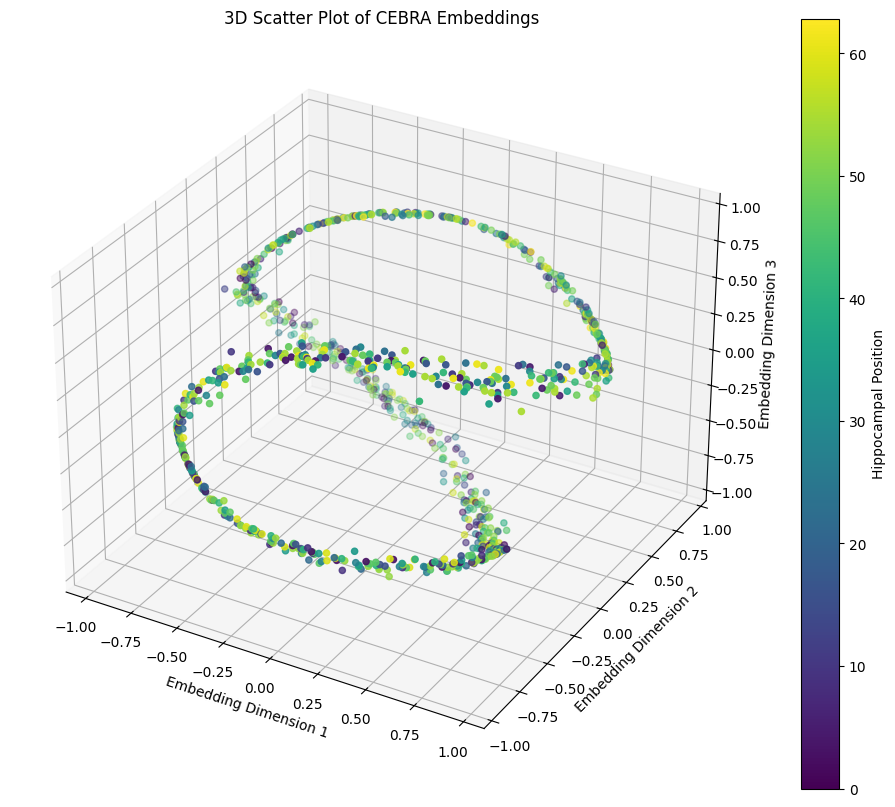

In [4]:
# Create and fit the CEBRA model
model_3d = cebra.CEBRA(output_dimension=3, batch_size=512, learning_rate=3e-4, max_iterations=1000)
model_3d.fit(neural_data)

# Transform the data to get the embeddings_2d
embeddings_3d = model_3d.transform(neural_data)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embeddings_3d[:, 0], 
                     embeddings_3d[:, 1], 
                     embeddings_3d[:, 2], 
                     c=hippocampal_position, 
                     cmap='viridis')

ax.set_xlabel('Embedding Dimension 1')
ax.set_ylabel('Embedding Dimension 2')
ax.set_zlabel('Embedding Dimension 3')
ax.set_title('3D Scatter Plot of CEBRA Embeddings')

cbar = fig.colorbar(scatter, ax=ax, label='Hippocampal Position')

plt.show()


# Testing out decoding behavioural variables (taken directly from cebra demos)

In [5]:
# import sklearn.metrics

# #NOT DONE

# cebra_decode_model = cebra(model_architecture='offset10-model',
#                         batch_size=512,
#                         learning_rate=3e-4,
#                         temperature=1,
#                         output_dimension=output_dimension,
#                         max_iterations=max_iterations,
#                         distance='cosine',
#                         conditional='time_delta',
#                         device='cuda_if_available',
#                         verbose=True,
#                         time_offsets=10)

# def split_data(data,pos, test_ratio):

#     split_idx = int(len(data)* (1-test_ratio))
#     neural_train = neural_data[:split_idx]
#     neural_test = neural_data[split_idx:]
#     label_train = pos[:split_idx]
#     label_test = pos[split_idx:]

#     return neural_train.numpy(), neural_test.numpy(), label_train.numpy(), label_test.numpy()

# neural_train, neural_test, label_train, label_test = split_data(neural_data, 0.2)


# pos_decoder = cebra.KNNDecoder(n_neighbors=36, metric="cosine")

# pos_decoder.fit(embeddings_3d)

# pos_pred = pos_decoder.predict(embedding_test)